<a href="https://colab.research.google.com/github/brookhut/population-dashboard/blob/master/%D0%9E%D0%B1%D0%BB%D0%B0%D0%BA%D0%BE_%D1%81%D0%BB%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# примерно так Colab выглядит в браузере перед началом работы
# ПОЕХАЛИ!

# Подготовка к работе

In [ ]:
!pip install wikipedia


  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp37-none-any.whl size=11686 sha256=76c8d934cfaf6db06b977355268291f0a65921dd48a316825a3b7b5d38957373
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [ ]:
!pip install stop-words

  Created wheel for stop-words: filename=stop_words-2018.7.23-cp37-none-any.whl size=32917 sha256=06ba526e5b97cdd33d813eafcc0a9cd8daf19de6bc775c48572c54d74ca2eec5
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


# Простое облако слов

In [ ]:
# Импортируем нужные библиотеки
import wikipedia
import re

# Выбираем язык Википедии и интересующую нас страницу
wikipedia.set_lang("ru")
wiki = wikipedia.page('Гарри Поттер')

# Извлекаем текст из полученной страницы
text = wiki.content

# Очищаем текст с помощью регулярных выражений
text = re.sub(r'==.*?==+', '', text) # удаляем лишние символы
text = text.replace('\n', '') # удаляем знаки разделения на абзацы

In [ ]:
# Импортируем библиотеку для визуализации
import matplotlib.pyplot as plt
%matplotlib inline


# Функция для визуализации облака слов
def plot_cloud(wordcloud):
    # Устанавливаем размер картинки
    plt.figure(figsize=(30, 20))
    # Показать изображение
    plt.imshow(wordcloud)
    # Без подписей на осях
    plt.axis("off")

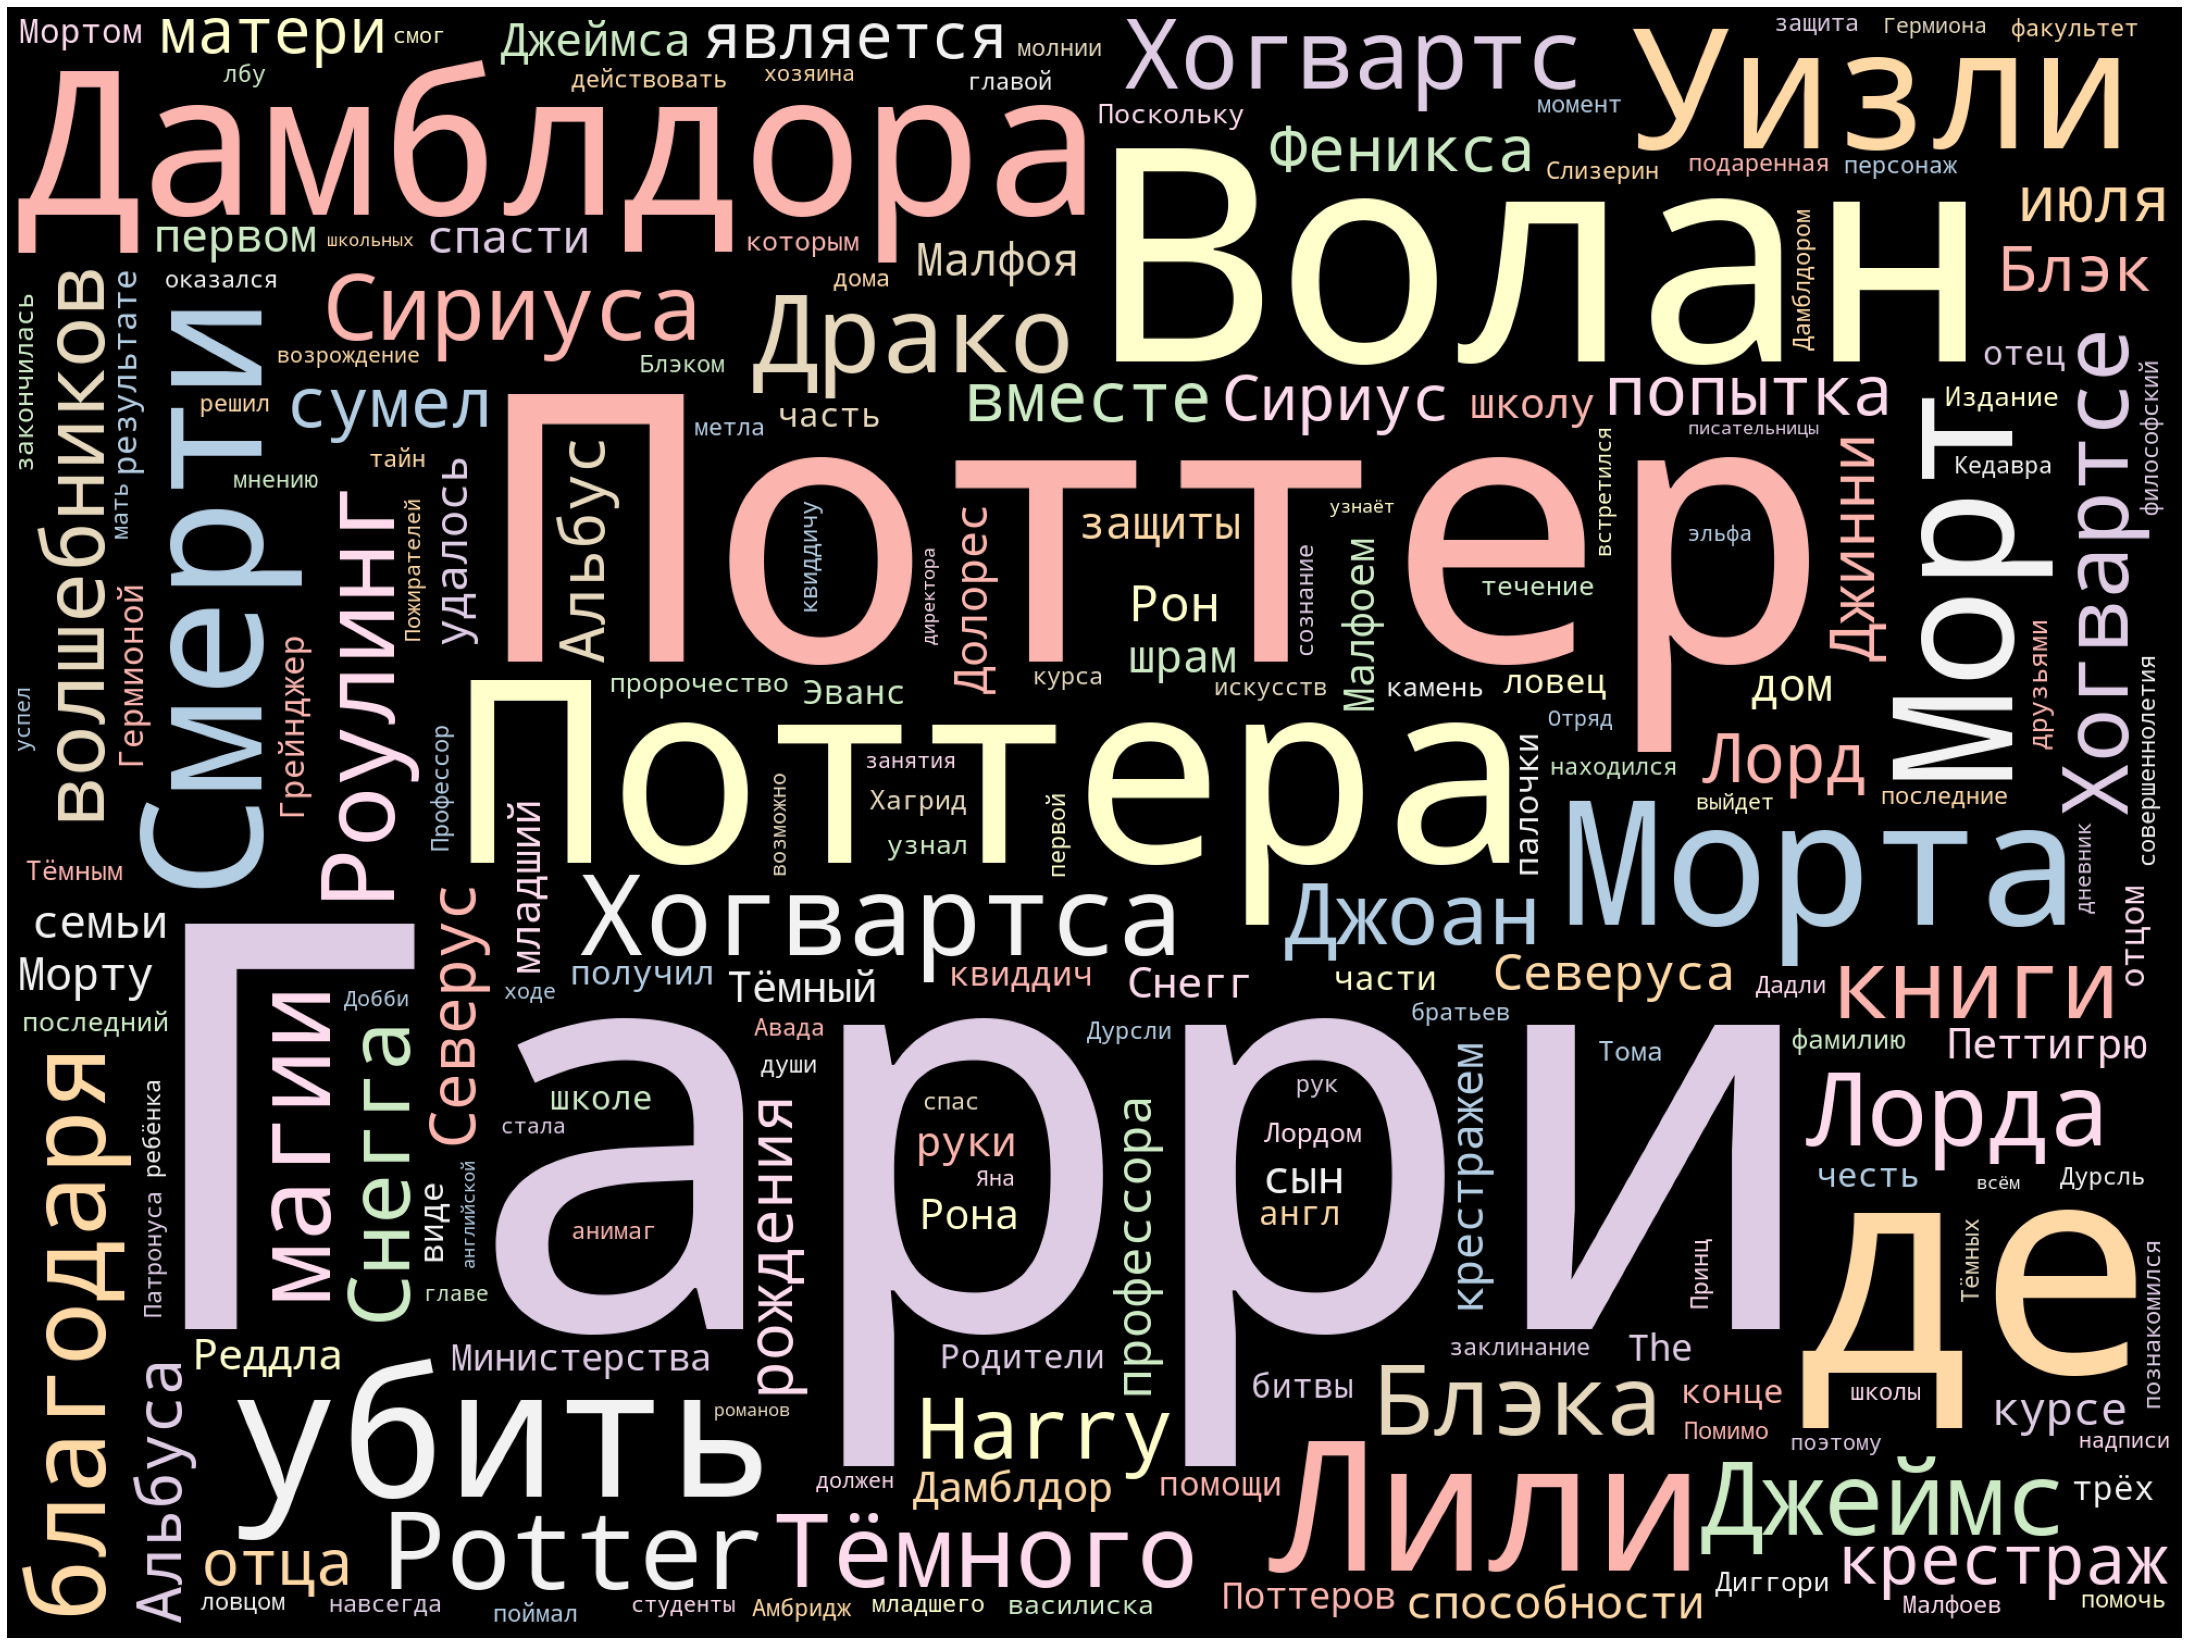

In [ ]:
# Импортируем инструменты для облака слов и списки стоп-слов
from wordcloud import WordCloud
from stop_words import get_stop_words


# Записываем в переменную стоп-слова русского языка
STOPWORDS_RU = get_stop_words('russian')

# Генерируем облако слов
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      random_state=1,
                      background_color='black',
                      margin=20,
                      colormap='Pastel1',
                      collocations=False,
                      stopwords = STOPWORDS_RU).generate(text)

# Рисуем картинку
plot_cloud(wordcloud)

In [ ]:
# Сохраним получившуюся картинку в файл
wordcloud.to_file('hp_cloud_simple.png')

# Облако слов из картинки

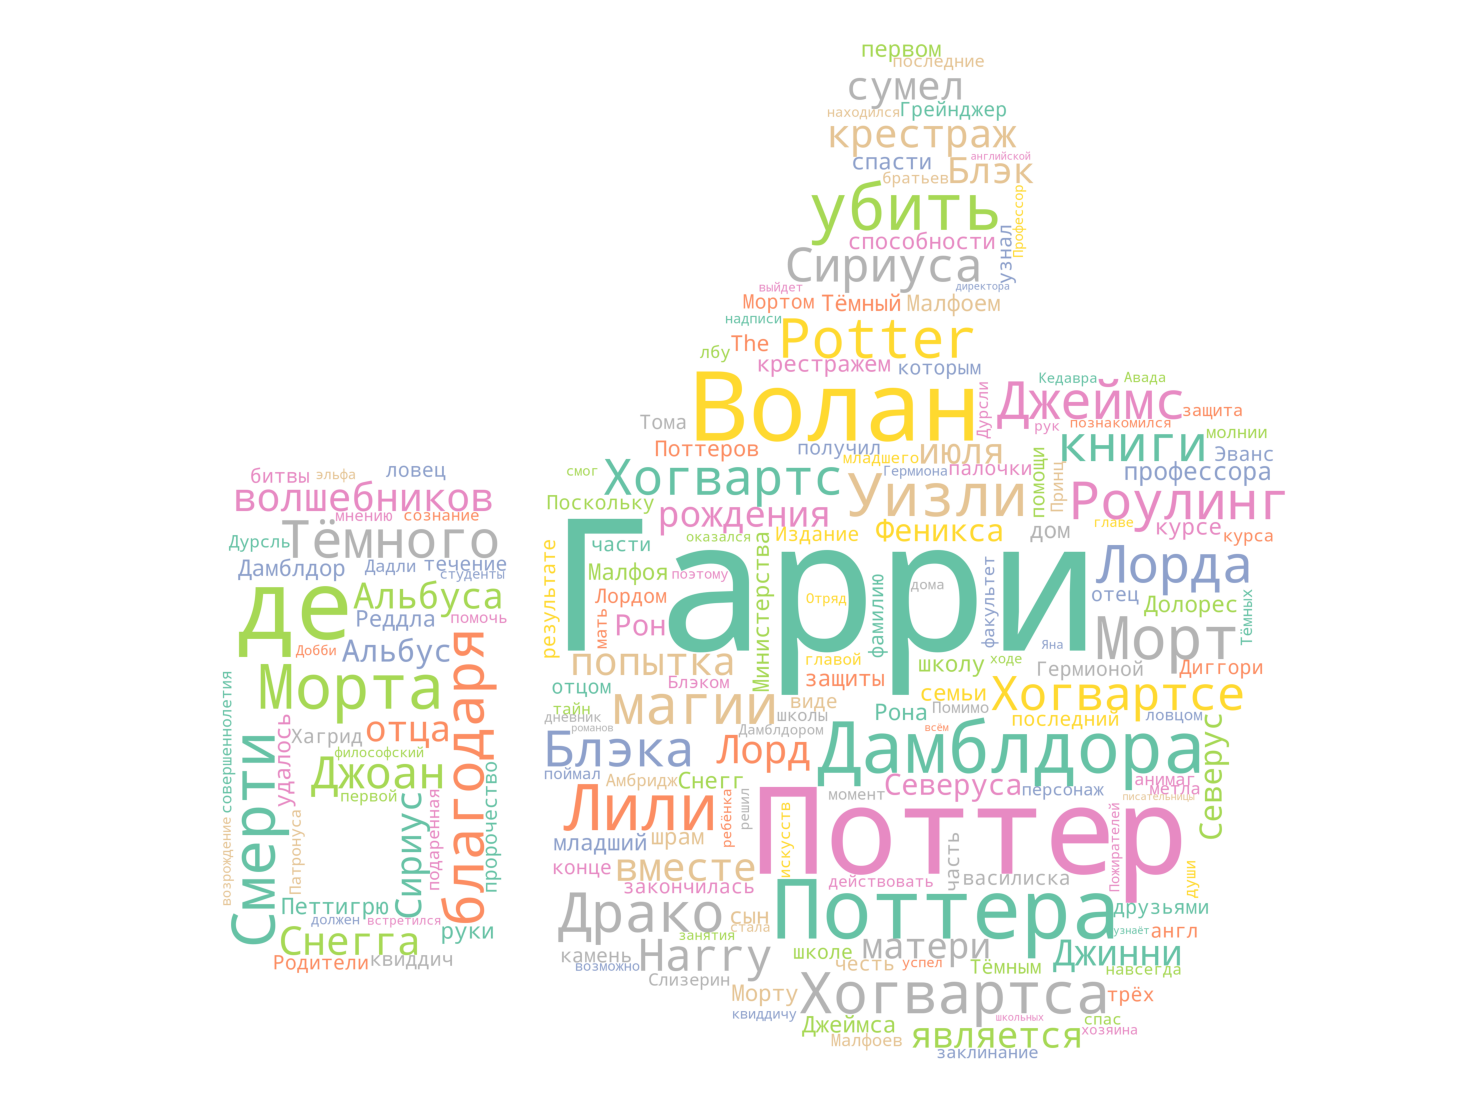

In [ ]:
# Импортируем необходимое
import numpy as np
from PIL import Image


# Превращаем картинку в маску
mask = np.array(Image.open('/content/upvote.png'))

# Генерируем облако слов
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      random_state=1,
                      background_color='white',
                      colormap='Set2',
                      collocations=False,
                      stopwords = STOPWORDS_RU,
                      mask=mask).generate(text)

# Выводим его на экран
plot_cloud(wordcloud)

In [ ]:
wordcloud.to_file('hp_upvote.png')